# PROBLEM STATEMENT: LOAN REPAYMENT MODEL--TO PREDICT A CUSTOMER WILL PAY THE LOAN OR NOTB

### DATA DESCRIPTION:

1.credit.policy: If the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
2.purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
3.int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
4.installment: The monthly installments owed by the borrower if the loan is funded.
5.log.annual.inc: The natural log of the self-reported annual income of the borrower.
6.dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
7.fico: The FICO credit score of the borrower.
8.days.with.cr.line: The number of days the borrower has had a credit line.
9.revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
10.revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
11.inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
12.delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
13.pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [48]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib as mpl

In [49]:
#step1-loading dataset
df  = pd.read_csv("loan_data_final.csv")

In [ ]:
#step2- analysing dataset

In [50]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,all_other,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,all_other,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [51]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [53]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [54]:
df.shape

(9578, 14)

In [55]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

Positive examples = 1533
Negative examples = 8045
Proportion of positive to negative examples = 19.06%


/usr/local/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


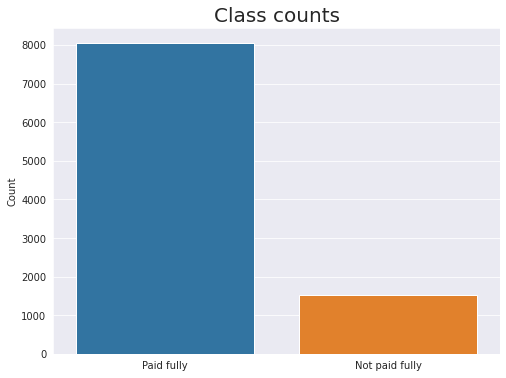

In [56]:
#visualising the data

pos = df[df["not.fully.paid"] == 1].shape[0]
neg = df[df["not.fully.paid"] == 0].shape[0]
print(f"Positive examples = {pos}")
print(f"Negative examples = {neg}")
print(f"Proportion of positive to negative examples = {(pos / neg) * 100:.2f}%")
plt.figure(figsize=(8, 6))
sns.countplot(df["not.fully.paid"])
plt.xticks((0, 1), ["Paid fully", "Not paid fully"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Class counts", y=1, fontdict={"fontsize": 20});

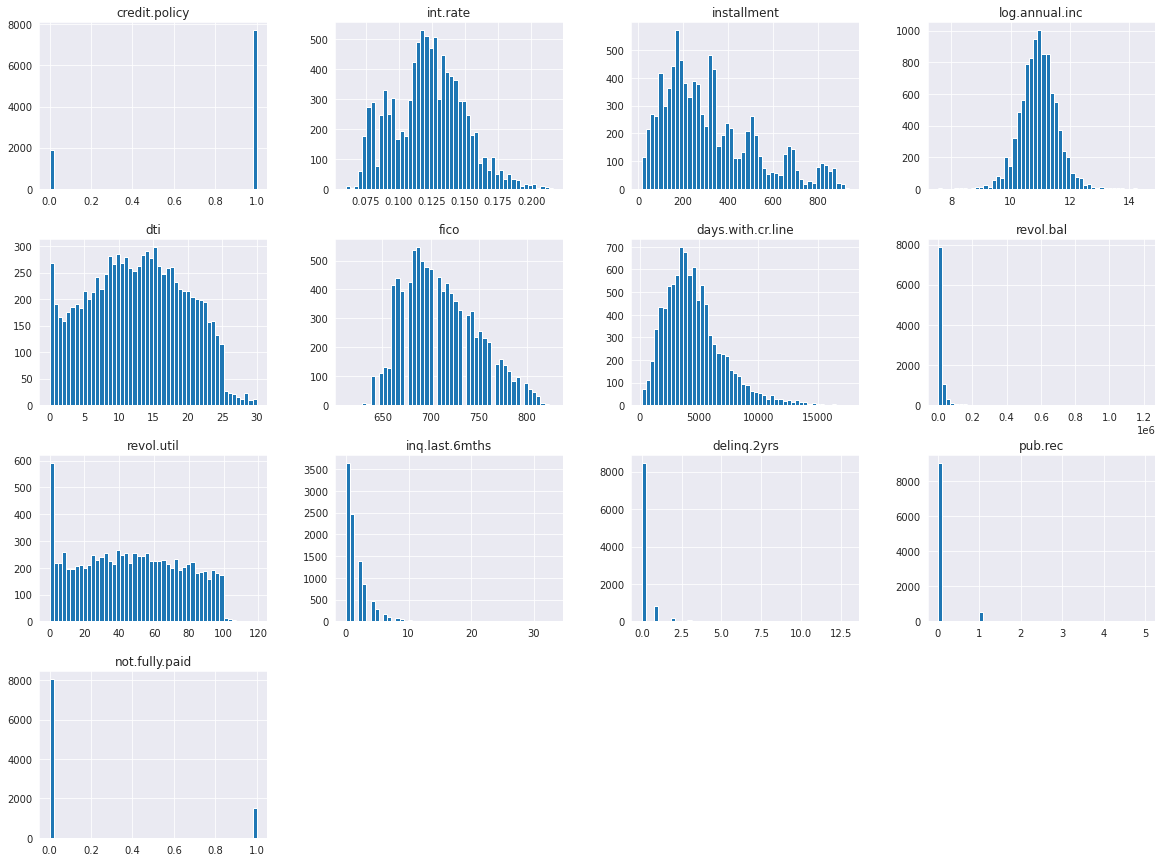

In [57]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [58]:
#label encoding -for categorical columns

df_cat=df[["purpose"]]
df_cat.head(10)

,purpose
0,debt_consolidation
1,all_other
2,debt_consolidation
3,debt_consolidation
4,all_other
5,all_other
6,debt_consolidation
7,all_other
8,all_other
9,debt_consolidation


In [59]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [75]:
num_data= df.drop(['not.fully.paid','purpose'],axis=1)
y = df['not.fully.paid']
X = df.drop('not.fully.paid',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [71]:
pipeline= Pipeline([
        ('std_scaler', StandardScaler()),
    ])
#data_transform= pipeline.fit_transform(num_data)

from sklearn.compose import ColumnTransformer

num_attribs = list(num_data)
cat_attribs = ["purpose"]
full_pipeline=ColumnTransformer([
        ("num", pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])


In [78]:
train_data_prepared = full_pipeline.fit_transform(X_train)
test_data_prepared=full_pipeline.fit_transform(X_test)

In [80]:
from sklearn.tree import DecisionTreeClassifier
tree =DecisionTreeClassifier()
tree.fit(train_data_prepared,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [84]:
from sklearn.metrics import accuracy_score
y_pred = tree.predict(test_data_prepared)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score {:.2f}%".format(accuracy * 100))

Accuracy Score 71.40%


In [85]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=100)
rfc.fit(train_data_prepared,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [87]:
y_pred = rfc.predict(test_data_prepared)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: {:.2f}%".format(accuracy * 100))

Accuracy Score: 84.81%


In [90]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(train_data_prepared,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [92]:
y_pred = reg.predict(test_data_prepared)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: {:.2f}%".format(accuracy * 100))

Accuracy Score: 84.45%


In [93]:
from xgboost import XGBClassifier
model=XGBClassifier(objective='binary:logistic')
model.fit(train_data_prepared,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

In [94]:
y_pred = model.predict(test_data_prepared)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: {:.2f}%".format(accuracy * 100))

Accuracy Score: 84.29%
